In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('Cleaned_Data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,excel,Extracted Skills,Educational Requirements,Company,State,Same State,Classified Size,Age_of_company,Num_Competitors,Revenue Numeric
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,"['Tableau', 'Excel', 'Python']",NaN,Tecolote Research,NM,0,Medium,51,1,75000000.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,"['Python', 'Java']",NaN,University of Maryland Medical System,MD,0,Enterprise,40,1,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,"['Python', 'SQL', 'Excel', 'D3.js']","Master's Degree, PhD",KnowBe4,FL,1,Medium,14,1,300000000.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,['Python'],NaN,PNNL,WA,1,Large,59,3,500000000.0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,"['SQL', 'Python']",NaN,Affinity Solutions,NY,1,Small,26,3,NaN


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'job_simp', 'Salary', 'Hourly_Pay', 'Employer_Provided',
       'Maximum Salary', 'Minimum Salary', 'Average Salary', 'python', 'scala',
       'java', 'sql', 'scikit-learn', 'tensorflow', 'keras', 'matplotlib',
       'tableau', 'powerbi', 'plotly', 'd3.js', 'apache spark', 'hadoop',
       'aws', 'google cloud', 'pandas', 'numpy', 'excel', 'Extracted Skills',
       'Educational Requirements', 'Company', 'State', 'Same State',
       'Classified Size', 'Age_of_company', 'Num_Competitors',
       'Revenue Numeric'],
      dtype='object')

In [4]:
#Defining features and target variable
features = [
    'Rating','Classified Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','job_simp', 'Hourly_Pay', 'Employer_Provided',
    'python','scala','java','sql','tableau','powerbi','apache spark','hadoop','aws','google cloud','excel',  
    'Same State', 'Age_of_company', 'Num_Competitors'
]

target_variable = 'Average Salary'  # Target variable

model_df = df[features + [target_variable]]

#Convert categorical variables to dummy variables
categorical_features = model_df.select_dtypes(include=['object']).columns.tolist()
model_df = pd.get_dummies(model_df, columns=categorical_features, drop_first=True)

#Prepare the feature set and target variable
X = model_df.drop(columns=[target_variable])
y = model_df[target_variable]


In [25]:
X

,Rating,Hourly_Pay,Employer_Provided,python,scala,java,sql,tableau,powerbi,apache spark,...,Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_simp_Data Engineer,job_simp_Data Scientist,job_simp_Director,job_simp_MLE,job_simp_Manager,job_simp_na
0,3.8,0,0,1,0,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
1,3.4,0,0,1,0,1,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,4.8,0,0,1,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,3.8,0,0,1,0,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False
4,2.9,0,0,1,0,0,1,0,0,0,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
738,4.4,0,0,1,1,1,1,0,0,0,...,False,False,False,False,True,False,False,False,False,False
739,2.6,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
740,3.2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [5]:
num_cols = [
    'Average Salary', 'Age_of_company', 'Same State', 'Num_Competitors','Rating'
]
vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols
vif_data["VIF"] = [variance_inflation_factor(model_df[num_cols].values, i) for i in range(len(num_cols))]

# Display the VIF data
print(vif_data)

           Feature       VIF
0   Average Salary  6.353939
1   Age_of_company  1.921316
2       Same State  2.274077
3  Num_Competitors  4.160905
4           Rating  8.899964


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lm.predict(X_test)

In [9]:
lm.score(X_test, y_test)

0.3974872302389082

In [10]:
cv_scores = cross_val_score(lm, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.00109249 0.40008361 0.52809843 0.49224214 0.3348867 ]
Average CV Score: 0.351280674008642


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 23.138212239006982
Mean Squared Error: 984.8138662141102
R-squared: 0.3974872302389082


In [12]:
# Setting up the parameter grid for Lasso regression
lasso_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Different values for the regularization strength
}

lasso = Lasso()
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, 
                                  scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train, y_train)

# Best parameters and best score
best_lasso = lasso_grid_search.best_estimator_
print("Best Lasso alpha:", lasso_grid_search.best_params_)
print("Best Lasso CV score (neg MSE):", lasso_grid_search.best_score_)

Best Lasso alpha: {'alpha': 0.1}
Best Lasso CV score (neg MSE): -846.3429651818748


In [13]:
# Setting up the parameter grid for Ridge regression
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Different values for the regularization strength
}

ridge = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, 
                                  scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train, y_train)

# Best parameters and best score
best_ridge = ridge_grid_search.best_estimator_
print("Best Ridge alpha:", ridge_grid_search.best_params_)
print("Best Ridge CV score (neg MSE):", ridge_grid_search.best_score_)

Best Ridge alpha: {'alpha': 1}
Best Ridge CV score (neg MSE): -863.4639327262555


In [14]:
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Mean Absolute Error: {mae_lasso}')
print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

Lasso Mean Absolute Error: 22.519576929810015
Lasso Mean Squared Error: 883.4450960543179
Lasso R-squared: 0.4595050191547412


In [15]:
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Absolute Error: {mae_ridge}')
print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Absolute Error: 22.346330237653167
Ridge Mean Squared Error: 880.5322987573796
Ridge R-squared: 0.46128707932604807


In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred_rf = rf_model.predict(X_test)

In [18]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Absolute Error: 13.64111164783258
Random Forest Mean Squared Error: 453.51658592962906
Random Forest R-squared: 0.7225368735195619


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               verbose=2,
                               n_jobs=-1)


rf_grid_search.fit(X_train, y_train)


print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best CV Score (neg MSE):", rf_grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score (neg MSE): -567.2237070609301


In [21]:
best_rf_model = rf_grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)


mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest Mean Absolute Error: {mae_best_rf}')
print(f'Best Random Forest Mean Squared Error: {mse_best_rf}')
print(f'Best Random Forest R-squared: {r2_best_rf}')

Best Random Forest Mean Absolute Error: 14.926377081267582
Best Random Forest Mean Squared Error: 494.89590680731027
Best Random Forest R-squared: 0.6972208517938643


In [22]:
performance_data = {
    'Metric': ['Mean Absolute Error', 'Mean Squared Error'],
    'Before Tuning': [13.64, 453.52],
    'After Tuning': [14.92, 494.89]
}

performance_df = pd.DataFrame(performance_data)
performance_df.set_index('Metric', inplace=True)

<Figure size 1000x600 with 0 Axes>

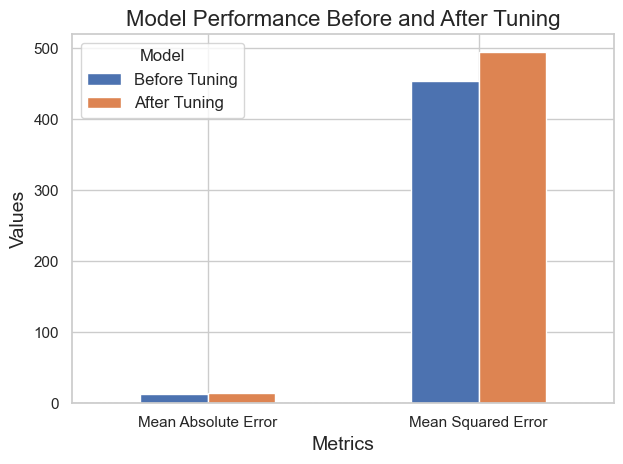

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

performance_df.plot(kind='bar', legend=True)

plt.title('Model Performance Before and After Tuning', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=0)  # Keep the x labels horizontal
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.legend(title='Model', fontsize=12)
plt.tight_layout()


plt.show()

In [24]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)